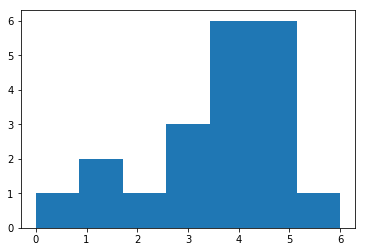

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import math

Y = [4,3,4,5,5,2,3,1,4,0,1,5,5,6,5,4,4,5,3,4]
plt.hist(Y, bins=7)
plt.show()

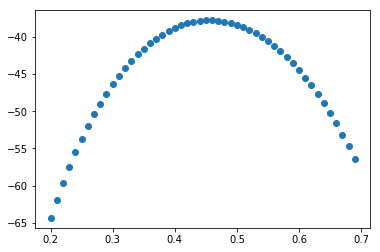

In [3]:
# nCrの計算
def comb(n, r):
    return math.factorial(n) // (math.factorial(n - r) * math.factorial(r))

# 対数尤度関数
def logL(x):
    l = sum([y * np.log(x) for y in Y]) + sum([(8-y)*np.log(1-x) for y in Y]) + sum([np.log(comb(8, y)) for y in Y])
    return l

# プロット
x = np.arange(0.2,0.7,0.01)
plt.plot(x, logL(x), 'o')
plt.show()

In [36]:
# ふらふら最尤推定
def furafura(f, x):
    x0 = x
    seq = []
    for _ in range(100):
        x1 = x0 + 0.01 if np.random.rand() < 0.5 else x0 - 0.01
        if f(x0) < f(x1):
            x0 = x1
            seq.append(x0)
    return seq

seq = furafura(logL, 0.1)
print(seq[-1])

0.4600000000000003


In [37]:
# scipy の optimize 関数を利用
# なぜか warning が出る
from scipy import optimize
x0 = optimize.fsolve(logL, 0.01)
print(x0)

[ 0.4560895]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [59]:
# メトロポリス法
def metro(f, x=0.1):
    x0 = x
    seq = []
    for _ in range(1000):
        x1 = x0 + 0.01 if np.random.rand() < 0.5 else x0 - 0.01
        # print(x0, x1, logL(x0), logL(x1), np.exp(logL(x1) - logL(x0)))
        if f(x0) < f(x1):
            x0 = x1
            seq.append(x0)
        elif np.random.rand() < np.exp(logL(x1) - logL(x0)):
            x0 = x1
            seq.append(x0)
    return seq

seq = metro(logL, 0.3)
print(seq[-1])

0.5600000000000002


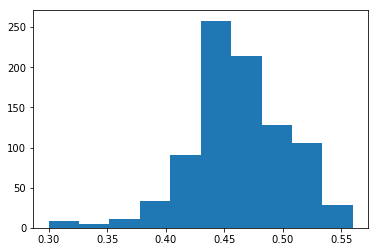

In [62]:
plt.hist(seq)
plt.show()

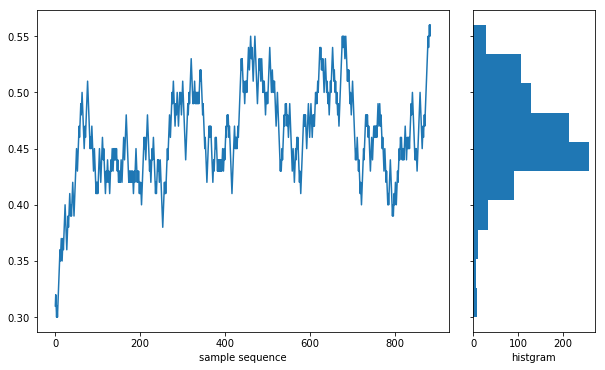

In [65]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

xx = seq

fig = plt.figure(figsize=(10,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.plot(xx)
ax_marg_y.hist(xx,orientation="horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('sample sequence')

# Set labels on marginals
ax_marg_y.set_xlabel('histgram')
plt.show()

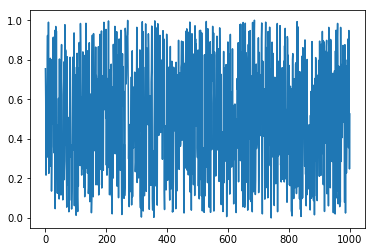

In [57]:
plt.plot([np.random.rand() for _ in range(1000)])
plt.show()